In [1]:
from ipyleaflet import Map, Marker,Polyline, FullScreenControl, WidgetControl, MarkerCluster
from ipywidgets import IntSlider,jslink
import gpxpy
import geopy.distance as distance
import matplotlib.pyplot as pplot

On lit le fichier des positions gps:

In [2]:
gpx_file = open('26_avr._2020_14_20_01.gpx', 'r')

On récupère les positions gps sous forme d'une liste de couples (latitude,longitude) :

In [3]:
gpx = gpxpy.parse(gpx_file)
points=gpx.tracks[0].segments[0].points

Il faut centrer la carte. Pour cela on calcule la moyenne des latitudes et des longitudes:

In [4]:
l=[(p.latitude,p.longitude) for p in points]
c=[sum(x) for x in zip(*l)]
center=(c[0]/len(l),c[1]/len(l))# le "centre" (la moyenne).

Et on dessine la carte, centrée en "center". Le facteur de zoom initial est un peu pifométrique: 

In [5]:
m = Map(center=center, zoom=15)

On ajoute une petite tirette pour le zoom:

In [6]:
zoom_slider = IntSlider(description='Zoom:', min=12, max=30, value=15)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)

In [7]:
display(m)

Map(center=[45.77690772881357, 4.869234008474576], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Bien. Maintenant on ajoute la trajectoire, qu'on a déja calculée. On ajoute aussi un bouton "Plein écran".

In [8]:
line = Polyline(
    locations=l,
    color="red" ,
    fill=False, weight=3
)
m.add_control(FullScreenControl())
m.add_layer(line)

Quelques calculs:

- Les distances entre les points successifs. C'est un service fourni par geopy (géodésiques sur l'ellipsoïde terrestre).
- La distance globale porcourue.
- Un "marker" tous les "delta" mêtres. 
- La vitesse moyenne entre deux mesures du GPS.

In [9]:
delta=300. # 300 mêtres

In [11]:
distance_parcourue=0.0
next = 0.0
marks=[]

for i,point in enumerate(points[1:]):
    new=(point.latitude,point.longitude)
    old=(points[i].latitude,points[i].longitude)
    d=distance.geodesic(new,old).m
    distance_parcourue += d
    if distance_parcourue >= next:
        next += delta
        marks.append(Marker(location=(point.latitude,point.longitude)))

In [12]:
print("Distance parcourue :",distance_parcourue)

Distance parcourue : 1317.6365876932878


Placer les marqueurs:

In [13]:
marker_cluster = MarkerCluster(
    markers=marks
)
m.add_layer(marker_cluster);

On redessine la carte :

In [14]:
print("zoomez pour voir les marqueurs");m

zoomez pour voir les marqueurs


Map(center=[45.77690772881357, 4.869234008474576], controls=(ZoomControl(options=['position', 'zoom_in_text', …

L'altitude au cours du parcours :

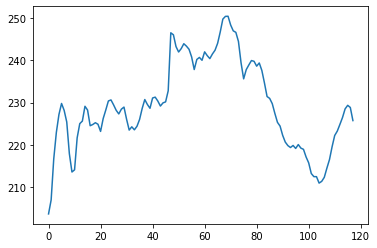

In [15]:
p=pplot.plot([point.elevation for point in points])